##### 1.读取data中2023_6文件夹中的openrank数据集，分析美国排名前一百的项目的的value的最大值、最小值、均值以及中位数。

In [1]:
import pandas as pd
data = pd.read_csv("./data/2023_6/open_rank_20236.csv")
def showdata(datas:pd.DataFrame,col:str):
    print("最大值：{}".format(datas[col].max()))
    print("最小值：{}".format(datas[col].min()))
    print("均值：{}".format(datas[col].mean()))
    print("中位数：{}".format(datas[col].median()))

showdata(data,'value')

最大值：1394.45
最小值：200.68
均值：346.9679
中位数：273.66999999999996


##### 2.读取data中2022文件夹下的activity_2020文件，分析美国排名前十的项目的平均增长率。

C:\Users\34065\AppData\Local\Temp\ipykernel_11488\3301057858.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dataArr[i][j] = (float(datas.loc[i][j+2])-float(datas.loc[i][j+1]))/float(datas.loc[i][j+1])


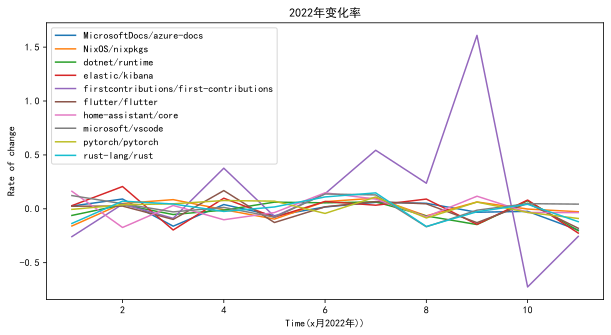

平均变化率：
项目:MicrosoftDocs/azure-docs , 平均变化率: -0.017927806693960283.
项目:NixOS/nixpkgs , 平均变化率: 0.00029453388757519605.
项目:dotnet/runtime , 平均变化率: -0.022848293771737936.
项目:elastic/kibana , 平均变化率: -0.003650706695878346.
项目:firstcontributions/first-contributions , 平均变化率: 0.1408237440823502.
项目:flutter/flutter , 平均变化率: -0.012404263515657559.
项目:home-assistant/core , 平均变化率: 0.008452684560254876.
项目:microsoft/vscode , 平均变化率: 0.022904691766440503.
项目:pytorch/pytorch , 平均变化率: 0.013160383781906931.
项目:rust-lang/rust , 平均变化率: -0.003778048850522401.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams['font.sans-serif'] = ['SimHei'] # 设置字体为SimHei
plt.rcParams['axes.unicode_minus']=False # 修复负号问题
data = pd.read_csv("./data/2022/activity_2022.csv")

def getRateOfChange(datas:pd.DataFrame):
    col = []
    index = datas['repo']
    for i in range(1,12):
        col.append("change {}".format(i))
    dataArr = np.ndarray(shape=(10,11))
    #print(ret)
    for i in range(0,10):
        for j in range(0,11):
            dataArr[i][j] = (float(datas.loc[i][j+2])-float(datas.loc[i][j+1]))/float(datas.loc[i][j+1])
    ret = pd.DataFrame(data=dataArr,index=index,columns=col,dtype=float)
    return ret

def showAct(datas:pd.DataFrame):
    len = datas.shape[0]
    sz = datas.shape[1]
    #print(len)
    x = np.arange(1,sz+1,1)
    #print(x)
    for i in range(len):
        y = np.array(datas.iloc[i])
        #print(y)
        plt.plot(x,y,label=datas.index[i])
def showAveChange(datas:pd.DataFrame):
    len = datas.shape[0]
    print("平均变化率：")
    for i in range(len):
        print("项目:{} , 平均变化率: {}.".format(datas.index[i],datas.iloc[i].mean()))
        
changedata = getRateOfChange(data)
plt.figure(figsize=(10,5))
plt.title("2022年变化率")
plt.ylabel("Rate of change")
plt.xlabel("Time(x月2022年))")
showAct(changedata)
plt.legend(changedata.index)
plt.show()
showAveChange(changedata)



这里可以看到firstcontribution的变化率波动较大，其他的相对平稳，就平均增长率来说，MicrosoftDocs/azure-docs，dotnet/runtime，elastic/kibana，flutter/flutter，rust-lang/rust小于0，其他均大于0.

##### 3.data/2022/china_2022.csv表示中国开源领域排名前十的企业。data/2022/global_2022.csv表示开源领域全球前十的的企业，请通过各种统计指标比较两者的各种数据差异。

In [3]:
dataChina = pd.read_csv(r"./data/2022/china_2022.csv")
dataGlobal = pd.read_csv(r"./data/2022/global_2022.csv")
print("中国开源领域排名前十的企业统计指标：")
dataChina.describe()

中国开源领域排名前十的企业统计指标：


,issue_comment,open_issue,open_pull,review_comment,merged_pull,rank,value,rankDelta,valueDelta
count,10.000000,10.000000,10.000000,10.00000,10.000000,10.00000,10.00000,10.000000,10.000000
mean,61205.500000,9169.200000,16912.700000,19857.50000,13764.100000,5.50000,40269.53400,5.300000,9265.007000
std,49332.487917,6810.653563,10068.922805,21115.07349,7692.752064,3.02765,30905.17181,9.944848,5327.824003
min,11741.000000,752.000000,1823.000000,2113.00000,1165.000000,1.00000,12033.71000,0.000000,2329.360000
25%,30943.500000,4625.250000,9376.750000,3120.00000,8067.250000,3.25000,15161.03750,0.000000,5268.947500
50%,39141.000000,6889.500000,15953.000000,10851.00000,13705.500000,5.50000,29789.23500,0.000000,9882.000000
75%,82179.500000,14225.500000,22483.250000,31507.75000,18216.250000,7.75000,58554.96250,3.250000,10666.070000
max,167814.000000,22397.000000,35266.000000,60402.00000,26732.000000,10.00000,103368.49000,25.000000,21093.110000


In [4]:
print("开源领域全球前十的的企业统计指标：")
dataGlobal.describe()

开源领域全球前十的的企业统计指标：


,issue_comment,open_issue,open_pull,review_comment,merged_pull,rank,value,rankDelta,valueDelta
count,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000
mean,3.414094e+05,43300.200000,83423.000000,120392.100000,62472.000000,5.50000,215855.491000,0.100000,11906.921000
std,4.226103e+05,54001.071938,87658.295125,128239.763444,73265.180035,3.02765,235189.889662,0.994429,26288.856142
min,7.853000e+04,13162.000000,27414.000000,35072.000000,15418.000000,1.00000,71636.820000,-2.000000,-47388.580000
25%,9.780075e+04,16630.500000,32980.000000,49480.000000,22151.500000,3.25000,89080.312500,0.000000,7749.432500
50%,1.786290e+05,21648.000000,49103.500000,70433.500000,33288.000000,5.50000,102790.850000,0.000000,14209.235000
75%,3.156160e+05,38010.500000,102867.000000,148395.000000,75093.750000,7.75000,252184.732500,1.000000,22235.555000
max,1.437317e+06,189185.000000,309685.000000,456166.000000,257123.000000,10.00000,824848.670000,1.000000,57536.090000


首先是平均值，可以看到issue_commemt,open_issue,open_pull,review_comment,merged_pull等指标的平均值，全球前十的项目均远大于国内前十的项目，可以推测全球前十的项目的活跃度是远高于国内前十的。  
从方差角度，valueDelta指标，全球前十的方差大于国内前十的方差，所以可以推测全球前十项目的竞争激烈程度大于国内前十的项目。

##### 4.贝叶斯定理
根据 OpenLeaderboard 上对前 10000 个活跃的项目统计，工具组件型项目占比 50 %，系统应用型占比 25 %，而内容资源型（非软件类）项目占比 25 %，成三分天下的态势。

非软件类项目中，带有 HTML/Markdown 标签的项目占 85 %，而软件类项目中带 HTML/Markdown标签的项目占比则为 10 %（注：HTML/Markdown 一般可用来书写文档内容）

工具组件型项目中，JavaScript 语言的项目占比 35 %，而非工具组件型项目中， JavaScript 语言的项目占比则为 10 %（注：JavaScript 是一种脚本编程语言，可以在网页上实现复杂的功能）

已知一个项目带有 HTML/Markdown 标签，那么该项目是非软件型项目的概率是多少？

解：  
&ensp;&ensp;记工具型项目占比为$p_1$，系统应用型占比为$p_2$，内容资源型（非软件类）项目占比为$p_3$，非软件类项目中，带有 HTML/Markdown 标签的项目占比为$p_4$，软件类项目中带 HTML/Markdown标签的项目占比为$p_5$，那么，有$p_1 = 0.5,p_2 = 0.25,p_3 = 0.25,p_4 = 0.85,p_5 = 0.1$。  
&ensp;&ensp;记已知一个项目带有 HTML/Markdown 标签，那么该项目是非软件型项目的概率为$p$，那么根据贝叶斯公式有：  
$$
p = \frac{p3*p4}{(p1+p2)*p5+p3*p4} = \frac{0.25*0.85}{0.25*0.85+0.75*0.1} = 0.7391304347826086
$$

##### 5.接上文，已知一个项目是由 JavaScript 语言编写的，那么它是工具组件型项目的概率是多少？

解：  
&ensp;&ensp;记工具组件型项目中，JavaScript 语言的项目占比为$p_6$，非工具组件型项目中， JavaScript 语言的项目占比为$p_7$，则$p_6 = 0.35,p_7 = 0.1$  
&ensp;&ensp;记已知一个项目是由 JavaScript 语言编写的，那么它是工具组件型项目的概率为$p$，则由贝叶斯公式：  
$$
p = \frac{p_1*p_6}{p_1*p_6+(1-p_1)*p_7} = \frac{0.5*0.35}{0.5*0.35+0.5*0.1} = \frac{7}{9}
$$

##### 6.根据以下数据建立可视化无向图

user = [1, 2, 3, 4]

edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

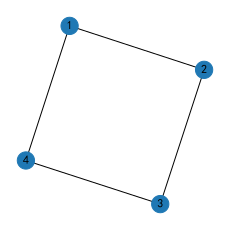

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
user = [1,2,3,4]
edge = [(1,2),(2,3),(3,4),(4,1)]
UG = nx.Graph()
plt.figure(figsize=(3,3))
UG.add_nodes_from(user)
UG.add_edges_from(edge)
pos=nx.spring_layout(UG)
nx.draw(UG,with_labels=True,pos=pos)
plt.show()

##### 7.根据以下数据建立可视化有向图

users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

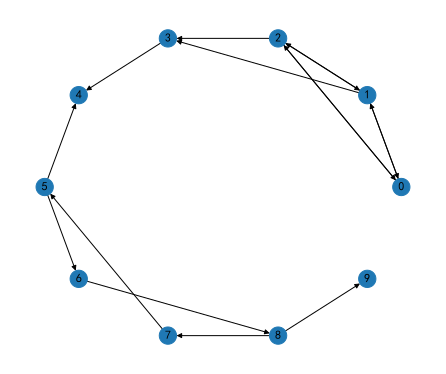

In [6]:
users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]
G = nx.DiGraph()
G.add_nodes_from(users)
G.add_edges_from(edges)
plt.figure(figsize=(6,5))
pos=nx.circular_layout(G)
nx.draw(G,with_labels=True,pos=pos)
plt.show()

##### 8.针对第七题构建的有向图，计算并输出每个节点的pagerank值。同时根据pagerank调整可视化图的大小，使得PageRank越大的节点在可视化结果中也越大。 pageRank算法原理：https://zh.wikipedia.org/wiki/PageRank

节点pagerank值：
0   0.19999794186311176
1   0.22499763028625736
2   0.22499763028625736
3   0.19999794186311176
4   0.34999727102568706
5   0.19999995231628415
6   0.14999995231628416
7   0.14999995231628416
8   0.19999995231628415
9   0.14999995231628416


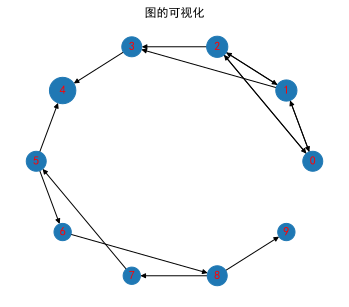

In [7]:
import math
d = 0.5
base = (1-d)/G.number_of_nodes()
pr = [1/G.number_of_nodes() for x in range(G.number_of_nodes())] #初始化pr数组
N = G.number_of_nodes()
baseSizeOfNode = 2000
flag = 1 #记录是否收敛(所有的pr变化小于1e-6时为收敛)
while flag:
    npr = [base for i in range(N)]
    flag = 0
    #开始遍历
    for x in G.nodes:
        num = len(G.edges([x]))
        for y in G.edges([x]):
            npr[y[1]]+=pr[x]/num
    for i in range(N):
        if math.fabs(pr[i]-npr[i])>1e-6:
            flag = 1
    pr = npr.copy()
print("节点pagerank值：")
for i in range(N):
    print(i," ",pr[i])
plt.figure(figsize=(6,5))
plt.title("图的可视化")
pos = nx.circular_layout(G)
nx.draw(G,pos,node_size = [baseSizeOfNode*pr[i] for i in range(N)])
nx.draw_networkx_labels(G,pos=pos,font_color='r')
plt.show()